In [1]:
import json
import random

f = open(r"C:\Users\halit.erdogan\PycharmProjects\DeepFake Audio\FULL_spects_and_labels_db.json")
dataraw = json.load(f)
random.shuffle(dataraw)

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sample = dataraw[5]
spec = np.asarray(sample["mel"])
spec

array([[-45.52416178, -44.1298033 , -43.96174604, ..., -44.99530786,
        -40.6183762 , -28.20516263],
       [-41.98484785, -40.50233272, -37.93139772, ..., -22.68904876,
        -23.07535044, -22.03308298],
       [-34.71506904, -34.56657092, -35.24202227, ..., -12.09273199,
        -12.04991261, -17.05977034],
       ...,
       [-62.92998614, -62.88578123, -61.86439143, ..., -61.30834723,
        -62.30593378, -62.39112677],
       [-62.19327608, -62.907135  , -63.11680375, ..., -62.60305514,
        -61.34021062, -61.60202087],
       [-61.61934452, -61.39704554, -60.8902614 , ..., -62.25619307,
        -63.92509753, -62.44451214]])

In [3]:
spec.shape

(128, 938)

In [4]:
spec = (spec - spec.mean()) / spec.std() #Z-normalization
spec

array([[ 0.5870253 ,  0.6905311 ,  0.7030063 , ...,  0.6262831 ,
         0.95119081,  1.87264653],
       [ 0.8497551 ,  0.95980493,  1.15065017, ...,  2.28211783,
         2.25344194,  2.33081138],
       [ 1.38940418,  1.40042747,  1.35028747, ...,  3.06870195,
         3.07188051,  2.69998954],
       ...,
       [-0.70504112, -0.70175971, -0.62594006, ..., -0.58466387,
        -0.65871656, -0.66504059],
       [-0.65035377, -0.70334484, -0.71890893, ..., -0.68077243,
        -0.58702915, -0.60646381],
       [-0.60774978, -0.59124811, -0.55362859, ..., -0.65502422,
        -0.77891007, -0.66900349]])

In [5]:
X = []
y = []
for sample in dataraw:
    specTemp = sample["mel"]
    labelTemp = sample["label"]
    specTemp = np.asarray(specTemp)
    specTemp_scaled = (specTemp - specTemp.mean()) / specTemp.std()
    X.append(specTemp_scaled)
    y.append(labelTemp)

In [6]:
X = np.asarray(X)

In [7]:
X = np.expand_dims(X,axis=-1)

In [8]:
X.shape

(830, 128, 938, 1)

In [9]:
y

['RealClips',
 'FakeClips',
 'FakeClips',
 'FakeClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'FakeClips',
 'FakeClips',
 'FakeClips',
 'FakeClips',
 'FakeClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'FakeClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'FakeClips',
 'RealClips',
 'FakeClips',
 'RealClips',
 'FakeClips',
 'FakeClips',
 'RealClips',
 'FakeClips',
 'FakeClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'FakeClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'FakeClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'RealClips',
 'FakeClips',
 'RealClips',
 'FakeClips',
 'FakeClips',
 'RealClips',
 'FakeClips',
 'FakeClips',
 'RealClips',
 'RealClips',
 'FakeClips',
 'FakeClips',
 'RealClips',
 'FakeClips',
 'Real

In [10]:
l = []
for i in y:
    if i == 'FakeClips':
        i=0
        l.append(i)
    elif i == 'RealClips':
        i=1
        l.append(i)
    else:
        print("anan")

In [11]:
l

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,


In [12]:
y = l

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import tensorflow as tf

In [15]:
inputs = tf.keras.Input(shape=(128,938,1))

In [16]:
x = tf.keras.layers.Conv2D(16,(2,2),activation = "relu")(inputs)

In [17]:
x = tf.keras.layers.MaxPooling2D(2,2)(x)

In [18]:
x = tf.keras.layers.Conv2D(32,(2,2),activation = "relu")(x)  
x = tf.keras.layers.MaxPooling2D(2,2)(x)

In [19]:
x = tf.keras.layers.Flatten()(x)

In [20]:
x = tf.keras.layers.Dense(32,activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)

In [21]:
output = tf.keras.layers.Dense(1,activation="sigmoid")(x)      #Adding the Hidden layer

In [22]:
model = tf.keras.Model(inputs=inputs, outputs=output)

In [23]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['acc'])

In [24]:
y_train = np.asarray(y_train)

In [25]:
y_train.shape

(664,)

In [26]:
X_train.shape

(664, 128, 938, 1)

In [27]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,

In [28]:
history = model.fit(X_train,y_train,verbose=1,batch_size=4,epochs=100)

Epoch 1/100
166/166 [==============================] - 18s 104ms/step - loss: 1.7103 - acc: 0.5919
Epoch 2/100
166/166 [==============================] - 17s 104ms/step - loss: 0.3997 - acc: 0.8042
Epoch 3/100
166/166 [==============================] - 17s 104ms/step - loss: 0.1666 - acc: 0.9292
Epoch 4/100
166/166 [==============================] - 17s 104ms/step - loss: 0.1217 - acc: 0.9593
Epoch 5/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0378 - acc: 0.9834
Epoch 6/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0224 - acc: 0.9940
Epoch 7/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0233 - acc: 0.9940
Epoch 8/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0228 - acc: 0.9864
Epoch 9/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0096 - acc: 0.9970
Epoch 10/100
166/166 [==============================] - 17s 104ms/step - loss: 0.0074 - acc: 1.0000
Epoch 11/

166/166 [==============================] - 18s 106ms/step - loss: 3.2019e-06 - acc: 1.0000
Epoch 82/100
166/166 [==============================] - 18s 107ms/step - loss: 2.8340e-04 - acc: 1.0000
Epoch 83/100
166/166 [==============================] - 18s 106ms/step - loss: 3.1036e-05 - acc: 1.0000
Epoch 84/100
166/166 [==============================] - 18s 107ms/step - loss: 8.4158e-06 - acc: 1.0000
Epoch 85/100
166/166 [==============================] - 18s 106ms/step - loss: 3.0170e-06 - acc: 1.0000
Epoch 86/100
166/166 [==============================] - 18s 106ms/step - loss: 0.0010 - acc: 1.0000
Epoch 87/100
166/166 [==============================] - 18s 106ms/step - loss: 6.3655e-04 - acc: 1.0000
Epoch 88/100
166/166 [==============================] - 18s 105ms/step - loss: 5.9148e-06 - acc: 1.0000
Epoch 89/100
166/166 [==============================] - 18s 106ms/step - loss: 0.0039 - acc: 0.9985
Epoch 90/100
166/166 [==============================] - 18s 106ms/step - loss: 1.7838

In [29]:
y_test = np.asarray(y_test)
y_test.shape

(166,)

In [30]:
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size=4, verbose=1)
print("accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("Loss: {}".format(eval_loss))

42/42 [==============================] - 1s 26ms/step - loss: 0.0755 - acc: 0.9880
accuracy: 98.80%
Loss: 0.0754583552479744


In [31]:
y_pred = np.round(model.predict(X_test),0)

In [32]:
import sklearn.metrics as metrics
classif_metrics = metrics.classification_report(y_test,y_pred,target_names = ['Fake','Real'])
print(classif_metrics)

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99        68
        Real       0.99      0.99      0.99        98

    accuracy                           0.99       166
   macro avg       0.99      0.99      0.99       166
weighted avg       0.99      0.99      0.99       166



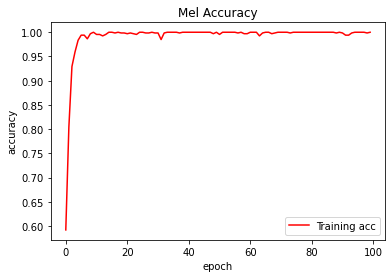

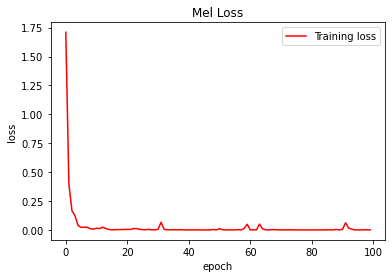

In [33]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
loss = history.history["loss"]
epochs = range(len(acc))
plt.plot(epochs, acc, "r", label="Training acc")
#plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Mel Accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
#plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Mel Loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

In [169]:
import pandas as pd
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

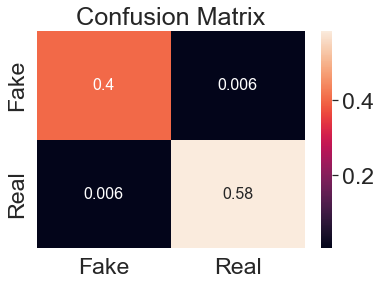

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


TP = 0
FP = 0
TN = 0
FN = 0

for i in range(0,len(y_pred)):
    if y_pred[i][0] == 1:
        if y_test[i] == 1:
            TN += 1
        if y_test[i] == 0:
            FN += 1
    if y_pred[i][0] == 0:
        if y_test[i] == 1:
            FP += 1
        if y_test[i] == 0:
            TP += 1

total = TN + FN + TP + FP
TN = TN / total
FN = FN / total
TP = TP / total
FP = FP / total


array = [[TP,FP],
         [FN,TN]]

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=2.1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title("Confusion Matrix")
plt.xticks([0.5,1.5], ["Fake","Real"])
plt.yticks([0.5,1.5], ["Fake","Real"])

plt.show()

In [187]:
print(TN)
print(FN)
print(FP)
print(TP)

104
0
1
61
